In [1]:
import omicverse as ov
#print(f"omicverse version: {ov.__version__}")
import scanpy as sc
#print(f"scanpy version: {sc.__version__}")
import pandas as pd
from tqdm.auto import tqdm
ov.plot_set()
import torch
import numpy as np

/home/toby/miniconda3/envs/omicverse/lib/python3.9/site-packages/cupy/_environment.py:369: UserWarning: CuPy failed to preload library (/home/toby/.cupy/cuda_lib/12.x/cutensor/2.0.0/lib/libcutensor.so.2.0.0): OSError (libcublasLt.so.12: cannot open shared object file: No such file or directory)
  warnings.warn(msg)



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [2]:
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Ti'

In [3]:
adata = sc.read("../../h5ad/v3_allGenes_myeloid_unintegrated_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 382320 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,GEM,prog,disease,sex,pair,age,...,disease.state,prog_sex,disease_sex,disease.state_sex,unintegrated_clusters,seurat_clusters,disease.patient,celltypes,celltypes.disease,celltypes.disease.state
GEM1_AAACCCAAGACCGCCT-1,SeuratProject,7049.0,2692.0,5.178039,GEM1,HC,HC,F,1.0,58.0,...,HC,F_HC,F_HC,F_HC,1,1,HC_GEM1,0,Classical_HC,Classical_HC
GEM1_AAACCCAAGAGTGGCT-1,SeuratProject,5247.0,2368.0,4.440633,GEM1,HC,HC,F,1.0,58.0,...,HC,F_HC,F_HC,F_HC,23,5,HC_GEM1,0,Classical_HC,Classical_HC
GEM1_AAACCCAAGTATCCTG-1,SeuratProject,8063.0,3077.0,4.564058,GEM1,HC,HC,F,1.0,58.0,...,HC,F_HC,F_HC,F_HC,0,0,HC_GEM1,0,Classical_HC,Classical_HC
GEM1_AAACCCAAGTGAGGTC-1,SeuratProject,15082.0,4290.0,5.523140,GEM1,HC,HC,F,1.0,58.0,...,HC,F_HC,F_HC,F_HC,12,2,HC_GEM1,1,Nonclassical_HC,Nonclassical_HC
GEM1_AAACCCACAACGCATT-1,SeuratProject,6238.0,2619.0,3.959602,GEM1,HC,HC,F,1.0,58.0,...,HC,F_HC,F_HC,F_HC,23,5,HC_GEM1,0,Classical_HC,Classical_HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM30_TTTGGTTTCACCCTTG-1,SeuratProject,11249.0,3549.0,3.146946,GEM30,progressor,MS,M,7.0,64.2,...,SP_Progressor,M_progressor,M_MS,M_SP_Progressor,12,2,SP_Progressor_GEM30,1,Nonclassical_MS,Nonclassical_Progressor
GEM30_TTTGGTTTCCGATTAG-1,SeuratProject,7784.0,3082.0,4.650565,GEM30,progressor,MS,M,7.0,64.2,...,SP_Progressor,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,0,Classical_MS,Classical_Progressor
GEM30_TTTGGTTTCGTTCAGA-1,SeuratProject,9920.0,3413.0,3.639113,GEM30,progressor,MS,M,7.0,64.2,...,SP_Progressor,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,0,Classical_MS,Classical_Progressor
GEM30_TTTGTTGAGCTCTTCC-1,SeuratProject,13113.0,4051.0,3.690994,GEM30,progressor,MS,M,7.0,64.2,...,SP_Progressor,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,0,Classical_MS,Classical_Progressor


In [16]:
adata.obs["prog"]

GEM1_AAACCCAAGACCGCCT-1             HC
GEM1_AAACCCAAGAGTGGCT-1             HC
GEM1_AAACCCAAGTATCCTG-1             HC
GEM1_AAACCCAAGTGAGGTC-1             HC
GEM1_AAACCCACAACGCATT-1             HC
                               ...    
GEM30_TTTGGTTTCACCCTTG-1    progressor
GEM30_TTTGGTTTCCGATTAG-1    progressor
GEM30_TTTGGTTTCGTTCAGA-1    progressor
GEM30_TTTGTTGAGCTCTTCC-1    progressor
GEM30_TTTGTTGTCCGGTAGC-1    progressor
Name: prog, Length: 382320, dtype: category
Categories (4, object): ['HC', 'RR', 'non-progressor', 'progressor']

In [4]:
# Define the disease states you want to include
disease_states_to_include = ['Classical']  # Replace with your specific disease states

# Subset the AnnData object based on the disease state metadata
subset_adata = adata[adata.obs['celltypes'].isin(disease_states_to_include)]

In [5]:
# Define the disease states you want to include
disease_states_to_include = ['progressor', 'RR']  # Replace with your specific disease states

# Subset the AnnData object based on the disease state metadata
subset_adata = subset_adata[subset_adata.obs['prog'].isin(disease_states_to_include)]

In [6]:
subset_adata

View of AnnData object with n_obs × n_vars = 161252 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected',

In [6]:
subset_adata = adata

In [6]:
# Random downsampling into 30K cells if the anndata object include more than 30 K cells.
n_cells_downsample = 5000
if subset_adata.shape[0] > n_cells_downsample:
    # Let's dowmsample into 30K cells
    sc.pp.subsample(subset_adata, n_obs=n_cells_downsample, random_state=123)

In [16]:
subset_adata

View of AnnData object with n_obs × n_vars = 5039 × 32914
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP.UNINTEGRATED'
    layers: 'logcounts'

In [17]:
del adata

In [7]:
prior_network = ov.single.load_human_prior_interaction_network(dataset='nichenet') 

Load the prior gene interaction network: nichenet. #Genes: 25345, #Edges: 5290993


In [9]:
data_matrix = subset_adata.X

# Convert the data matrix to float
data_matrix_float = data_matrix.astype(np.float32)

In [10]:
subset_adata.X = data_matrix_float

In [18]:
data_matrix_float

NameError: name 'data_matrix_float' is not defined

In [8]:
CEFCON_obj = ov.single.pyCEFCON(subset_adata, prior_network, repeats=5, solver='GUROBI')
CEFCON_obj

In [9]:
CEFCON_obj

In [ ]:
CEFCON_obj.preprocess()

Start data preparation

[0] - Data loading and preprocessing...
Consider the input data with 1 lineages:
  Lineage - all:


In [23]:
CEFCON_obj.train()

Start model training



AttributeError: 'pyCEFCON' object has no attribute 'data'

In [28]:
# Idenytify driver regulators for each lineage
CEFCON_obj.predicted_driver_regulators()

Start predict lineage - all:
Start calculate gene influence score - all:
Start calculate gene driver regulators - all:
[2] - Identifying driver regulators...
Restricted license - for non-production use only - expires 2025-11-24
  Solving MFVS problem...
    40 critical nodes are found.
    0 nodes left after graph reduction operation.
  40 MFVS driver genes are found.
  Solving MDS problem...
    9 critical nodes are found.
    496 nodes left after graph reduction operation.
    Solving the Integer Linear Programming problem on the reduced graph...
      Solving by GUROBI...(optimal value with GUROBI:95.0,  status:optimal)
  104 MDS driver genes are found.


In [29]:
CEFCON_obj.cefcon_results_dict

{'all': CefconResults object with n_cells * n_genes = 5580 * 1645, n_edges = 13480
     name: all
     expression_data: yes
     network: DiGraph with 1645 nodes and 13464 edges
     gene_embedding: # dimension = 64
     influence_score: yes
     driver_regulator: yes
     gene_cluster: None
     RGMs_AUCell_dict: None}

In [30]:
CEFCON_obj.cefcon_results_dict['all'].driver_regulator.head()

,influence_score,is_driver_regulator,is_MFVS_driver,is_MDS_driver,is_TF
EZH2,6.848242,True,True,True,False
EGR1,6.502758,True,True,True,True
JUN,6.388240,True,True,True,True
TCF4,6.362891,True,True,True,True
AR,6.266901,True,True,True,True


In [31]:
CEFCON_obj.predicted_RGM()

Start calculate regulon-like gene modules - all:
[3] - Identifying regulon-like gene modules...
Done!
Finish predicted



In [32]:
CEFCON_obj.cefcon_results_dict

{'all': CefconResults object with n_cells * n_genes = 5580 * 1645, n_edges = 13480
     name: all
     expression_data: yes
     network: DiGraph with 1645 nodes and 13464 edges
     gene_embedding: # dimension = 64
     influence_score: yes
     driver_regulator: yes
     gene_cluster: None
     RGMs_AUCell_dict: yes}

In [33]:
lineage = 'all'
result = CEFCON_obj.cefcon_results_dict[lineage]

In [34]:
gene_ad=sc.AnnData(result.gene_embedding)
sc.pp.neighbors(gene_ad, n_neighbors=30, use_rep='X')
# Higher resolutions lead to more communities, while lower resolutions lead to fewer communities.
sc.tl.leiden(gene_ad, resolution=1)
sc.tl.umap(gene_ad, n_components=2, min_dist=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


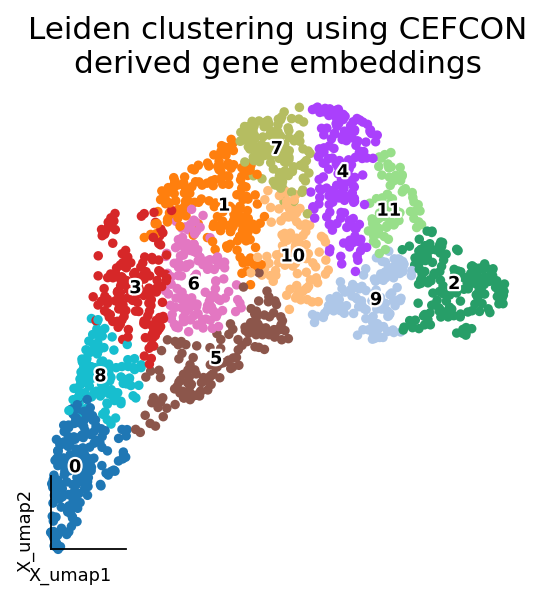

In [35]:
ov.utils.embedding(gene_ad,basis='X_umap',legend_loc='on data',
                       legend_fontsize=8, legend_fontoutline=2,
                  color='leiden',frameon='small',title='Leiden clustering using CEFCON\nderived gene embeddings')

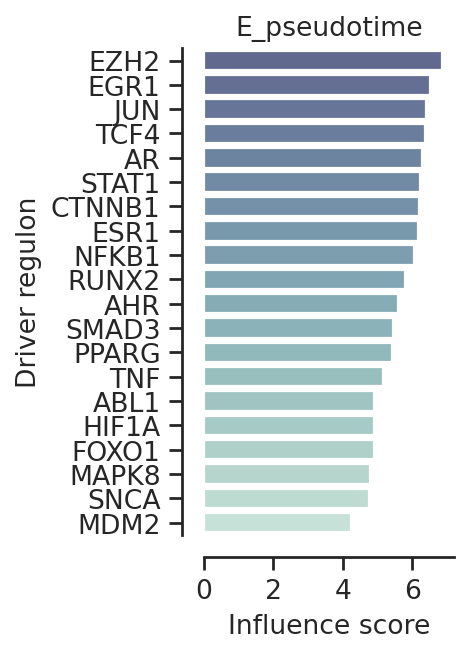

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
data_for_plot = result.driver_regulator[result.driver_regulator['is_driver_regulator']]
data_for_plot = data_for_plot[0:20]

plt.figure(figsize=(2, 20 * 0.2))
sns.set_theme(style='ticks', font_scale=0.5)

ax = sns.barplot(x='influence_score', y=data_for_plot.index, data=data_for_plot, orient='h',
                 palette=sns.color_palette(f"ch:start=.5,rot=-.5,reverse=1,dark=0.4", n_colors=20))
ax.set_title(result.name)
ax.set_xlabel('Influence score')
ax.set_ylabel('Driver regulators')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('E_pseudotime',fontsize=12)
plt.xlabel('Influence score',fontsize=12)
plt.ylabel('Driver regulon',fontsize=12)

sns.despine()

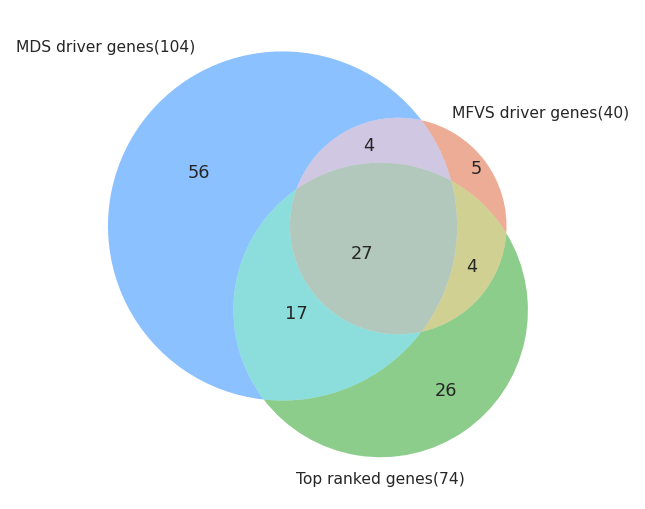

In [38]:
result.plot_driver_genes_Venn()

In [39]:
result.name = "disease.state"

In [42]:
result.name

'disease.state'

In [40]:
adata_lineage = subset_adata[subset_adata.obs_names[subset_adata.obs[result.name].notna()],:]

In [46]:
colors = [ "#F4CCCC", "#E6E6FA", "#FFE5B4", "#C7E5C9",
  "#ADD8E6", "#DA70D6", "#FFFACD", "#D3D3D3"]

<Figure size 320x320 with 0 Axes>

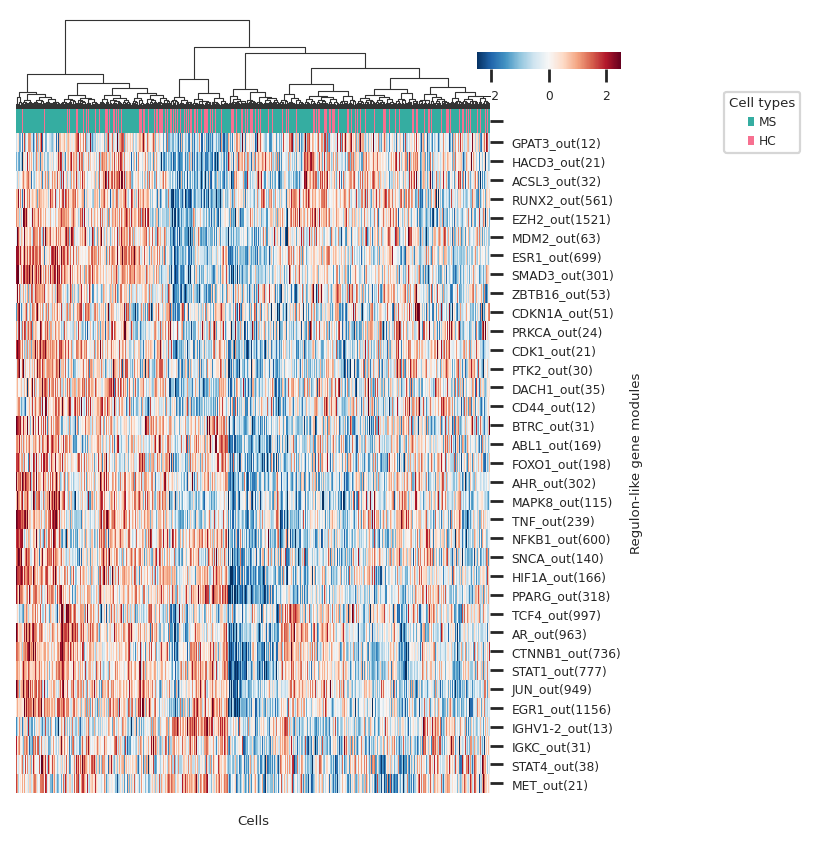

In [52]:
adata_lineage = subset_adata[subset_adata.obs_names[subset_adata.obs[result.name].notna()],:]

result.plot_RGM_activity_heatmap(cell_label=adata_lineage.obs['disease'],
                                 type='out',col_cluster=True,bbox_to_anchor=(1.48, 0.25))
